# L-1 Task-2 Cleaning Data

1) Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sea
pd.set_option('display.max_columns', None)


2) Load Dataset

In [2]:
file_path = "AB_NYC_2019.csv"  
data = pd.read_csv(file_path)

print("Dataset Loaded Successfully!")
print("Shape:", data.shape)
data.head()

Dataset Loaded Successfully!
Shape: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


3) Initial Exploration

In [3]:
print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

print("\nDuplicate Rows:", data.duplicated().sum())

print("\nDescriptive Statistics:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review      

4) Handle Missing Values

In [4]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

data.dropna(subset=['name', 'host_name'], inplace=True)

print("\nMissing Values After Cleaning:")
print(data.isnull().sum())


Missing Values After Cleaning:
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


5) Remove Duplicates

In [5]:
before = data.shape[0]
data.drop_duplicates(inplace=True)
after = data.shape[0]
print(f"\nRemoved {before - after} duplicate rows.")


Removed 0 duplicate rows.


6) Standardize Data Formats

In [7]:

data['neighbourhood_group'] = data['neighbourhood_group'].str.lower()
data['room_type'] = data['room_type'].str.lower()

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

7) Outlier Detection and Handling

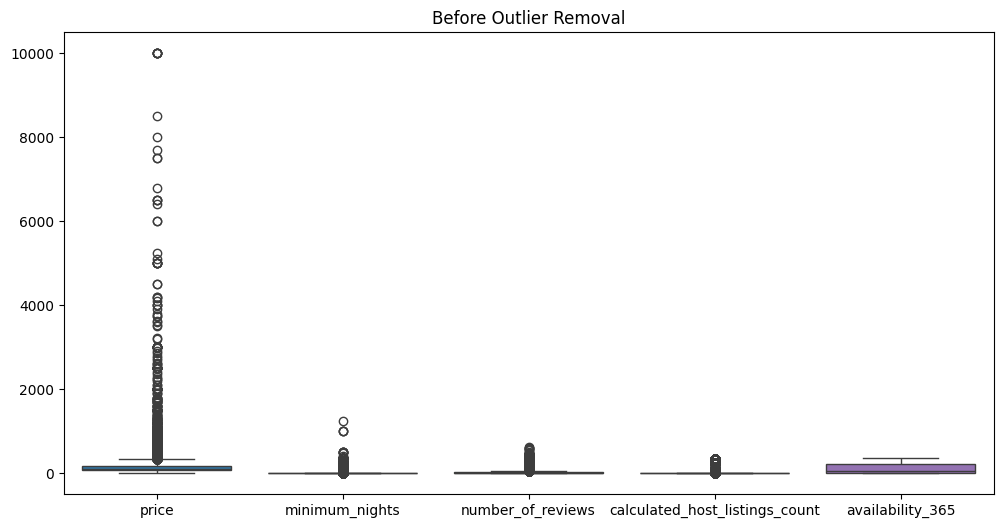

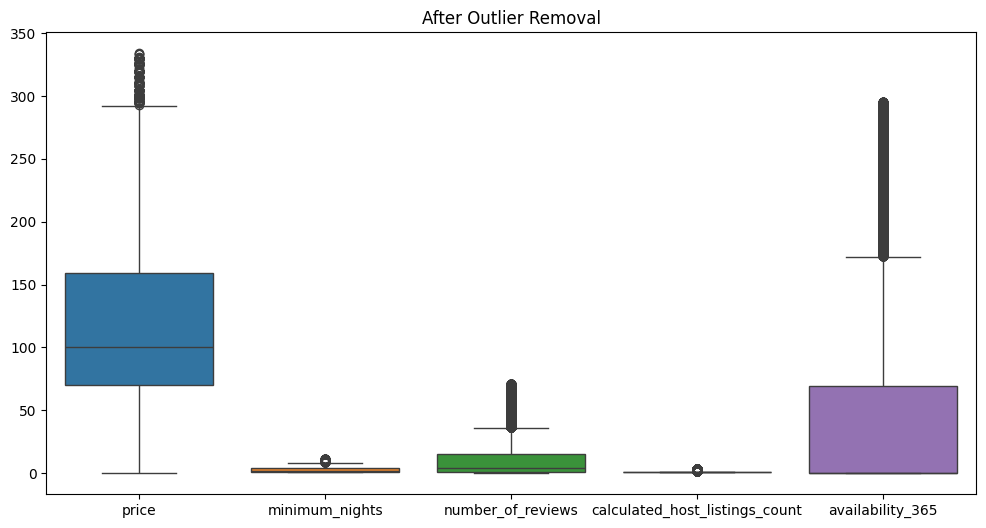

In [8]:
num_cols = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
plot.figure(figsize=(12, 6))
sea.boxplot(data=data[num_cols])
plot.title("Before Outlier Removal")
plot.show()

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower) & (data[col] <= upper)]

plot.figure(figsize=(12, 6))
sea.boxplot(data=data[num_cols])
plot.title("After Outlier Removal")
plot.show()

8) Summary After Cleaning

In [9]:
print("\nCleaned Dataset Shape:", data.shape)
print("Remaining Missing Values:\n", data.isnull().sum())

print("\nDescriptive Stats After Cleaning:")
print(data.describe())



Cleaned Dataset Shape: (28721, 16)
Remaining Missing Values:
 id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5741
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Descriptive Stats After Cleaning:
                 id       host_id      latitude     longitude         price  \
count  2.872100e+04  2.872100e+04  28721.000000  28721.000000  28721.000000   
mean   1.930902e+07  6.112242e+07     40.728668    -73.952924    120.893945   
std    1.046026e+07  7.38056

9) Save Cleaned Dataset

In [11]:
cleaned_path = "Cleaned_AB_NYC_2019.csv"
data.to_csv(cleaned_path, index=False)
print(f"\n Cleaned dataset saved as '{cleaned_path}'")


 Cleaned dataset saved as 'Cleaned_AB_NYC_2019.csv'
